In [30]:
import matplotlib.pyplot as plt
import numpy as np
# plt.style.use('ggplot')
%matplotlib inline
plt.rc('text',usetex=True)

# model = 'LV'
model = 'BioPath'

# Valid values for LV
# n = 34
# n = 51


# Valid values for BioPath
# n = 14
n = 28

prefixes = {'LV': ['GON','RBF','RK3G'],'BioPath':['GON','MLP','RK3G']}



In [31]:
datasets = ['par/{}/n{}/{}{}.csv'.format(model,n,i,n) for i in prefixes[model]]
print datasets

['par/BioPath/n28/GON28.csv', 'par/BioPath/n28/MLP28.csv', 'par/BioPath/n28/RK3G28.csv']


In [32]:
parameters = {'LV': ['alpha','beta','gamma','delta'],
             'BioPath':['k_1','k_2','k_3','k_4','k_5/k_6']}
true_values = {'alpha':0.2,'beta':0.35,'gamma':0.7,'delta':0.4,'k_1':0.07,'k_2':0.6,'k_3':0.05,'k_4':0.3,'k_5/k_6':0.017/0.3}

In [33]:
#Load all the datasets
values = {}
for f in datasets:
    values[f] = np.genfromtxt(f,delimiter=',')
    if model == 'BioPath':
        values[f][:,4] = values[f][:,4]/values[f][:,5]
nreps, npars = values[datasets[0]].shape

    

npars = len(parameters[model])
nfiles = len(datasets)
print nreps,npars,nfiles


42 5 3


<h2>Original plots</h2>

$\displaystyle k_1$
$\displaystyle k_2$
$\displaystyle k_3$
$\displaystyle k_4$
$\displaystyle k_5/k_6$


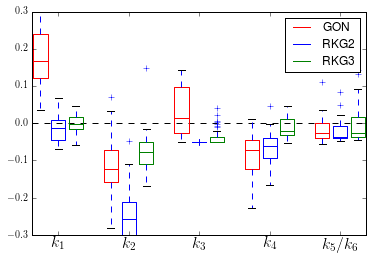

In [34]:
d = np.zeros((nreps,nfiles*npars),np.double)
pos = 0
plt.figure()
ax = plt.axes()
plt.hold(True)

tickpos = []
positions = []
pos = 0
d = np.zeros((nreps,nfiles*npars),np.double)
for i,p in enumerate(parameters[model]):
    for j,f in enumerate(datasets):
        d[:,pos] = values[f][:,i] - true_values[p]
        pos+=1
if model == 'LV':        
    positions = [1,2,3,5,6,7,9,10,11,13,14,15]
    ticks = [2,6,10,14]
else:
    positions = [1,2,3,5,6,7,9,10,11,13,14,15,17,18,19]
    ticks = [2,6,10,14,18]

    
plt.plot([0.5,positions[-1]+0.5],[0,0],'k--')
bp = plt.boxplot(d,positions = positions,widths=0.8)

model_cols = {0:'red',1:'blue',2:'green'}
for j in model_cols:
    for i in np.arange(j,3*npars,3):
        for q in ['boxes','medians']:
            plt.setp(bp[q][i],color=model_cols[j],lw=1.0)
        

parnames = []
for p in parameters[model]:
    if model == 'LV':
        s = r"$\displaystyle\{}$".format(p)
    else:
        s = r"$\displaystyle {}$".format(p)
    print s
    parnames.append(s)
plt.xticks(ticks,parnames,fontsize=16)
plt.ylim([-0.3,0.3])


import matplotlib.lines as mlines
model1 = mlines.Line2D([], [], color='red',
                          markersize=15, label=prefixes[model][0])
model2 = mlines.Line2D([], [], color='blue',
                          markersize=15, label='RKG2')

model3 = mlines.Line2D([], [], color='green',
                          markersize=15, label='RKG3')


plt.legend(handles=[model1,model2,model3])

filename = "boxes_{}_n{}.pdf".format(model,n)
plt.savefig(filename)
        
    

<h2>Stats tests</h2>

In [35]:
from scipy.stats import ttest_rel,ttest_1samp

In [37]:
to_compare = [1,2]

for i,p in enumerate(parameters[model]):
    t,pv = ttest_1samp(np.abs(values[datasets[to_compare[0]]][:,i]-true_values[p])-np.abs(values[datasets[to_compare[1]]][:,i]-true_values[p]),0)
    print values[datasets[to_compare[0]]][:,i]
    print "Parameter {}, p-value {}".format(p,pv)

[             nan   2.75689300e-30   1.38585600e-01   8.36749300e-02
   4.62779000e-02   5.82617700e-02   4.92767100e-22   5.76644500e-02
   1.38151400e-02   7.60432500e-02   2.34706200e-02   0.00000000e+00
   2.48750700e-02   1.41508000e-64   1.37084500e-01   9.95713900e-02
   2.28187300e-02   7.88269700e-02   6.70266400e-02   1.26784900e-01
   3.31319500e-30   1.37525100e-01   2.43007100e-02   6.61050000e-02
   5.20222300e-02   7.68534100e-02   1.07695600e-05   5.38915300e-02
   6.63031100e-02   8.32232700e-02   3.74511800e-02   5.30448800e-02
   2.16498100e-02   2.90150800e-02   1.31678900e-01   7.91637500e-02
   4.77578800e-02   2.66889900e-02   7.06842300e-02   6.72818500e-02
   6.69537800e-02   9.66796900e-02]
Parameter k_1, p-value nan
[       nan  0.4071807  0.3446684  0.3580455  0.3932508  0.2127885
  0.4590661  0.3945611  0.3885298  0.3522302  0.3590366  0.2801206
  0.3965421  0.5510487  0.4011103  0.3596792  0.3822199  0.2785755
  0.3575782  0.3616917  0.193162   0.2855964  

<h2>Difference plot</h2>

$\displaystyle k_1$
$\displaystyle k_2$
$\displaystyle k_3$
$\displaystyle k_4$
$\displaystyle k_5/k_6$


/Library/Python/2.7/site-packages/matplotlib/cbook.py:2028: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Library/Python/2.7/site-packages/matplotlib/cbook.py:2035: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/Library/Python/2.7/site-packages/matplotlib/cbook.py:2043: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/Library/Python/2.7/site-packages/matplotlib/cbook.py:2044: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


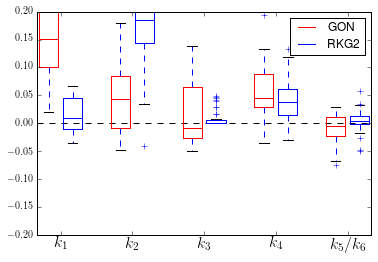

In [22]:
d = np.zeros((nreps,nfiles*npars),np.double)
pos = 0
plt.figure()
ax = plt.axes()
plt.hold(True)

tickpos = []
positions = []
pos = 0
d = np.zeros((nreps,nfiles*npars),np.double)
for i,p in enumerate(parameters[model]):
    for j,f in enumerate(datasets):
        d[:,pos] = np.abs(values[f][:,i] - true_values[p])
        pos+=1
        
        
if model == 'LV':        
#     positions = [1,2,3,5,6,7,9,10,11,13,14,15]
    positions = [1,2,4,5,7,8,10,11]
    ticks = [1.5,4.5,7.5,10.5]
    plot_cols = [0,1,3,4,6,7,9,10]
    d[:,0]-=d[:,2]
    d[:,1]-=d[:,2]
    d[:,2]-=d[:,2]
    d[:,3]-=d[:,5]
    d[:,4]-=d[:,5]
    d[:,5]-=d[:,5]
    d[:,6]-=d[:,8]
    d[:,7]-=d[:,8]
    d[:,8]-=d[:,8]
    d[:,9]-=d[:,11]
    d[:,10]-=d[:,11]
    d[:,11]-=d[:,11]  

    
else:
    
#     positions = [1,2,3,5,6,7,9,10,11,13,14,15,17,18,19]
    positions = [1,2,4,5,7,8,10,11,13,14]
    ticks = [1.5,4.5,7.5,10.5,13.5]
    plot_cols = [0,1,3,4,6,7,9,10,12,13]
    d[:,0]-=d[:,2]
    d[:,1]-=d[:,2]
    d[:,2]-=d[:,2]
    d[:,3]-=d[:,5]
    d[:,4]-=d[:,5]
    d[:,5]-=d[:,5]
    d[:,6]-=d[:,8]
    d[:,7]-=d[:,8]
    d[:,8]-=d[:,8]
    d[:,9]-=d[:,11]
    d[:,10]-=d[:,11]
    d[:,11]-=d[:,11]  
    d[:,12]-=d[:,14]
    d[:,13]-=d[:,14]
    d[:,14]-=d[:,14]  


    
plt.plot([0.5,positions[-1]+0.5],[0,0],'k--')
bp = plt.boxplot(d[:,plot_cols],positions = positions,widths=0.8)

model_cols = {0:'red',1:'blue'}
for j in model_cols:
    for i in np.arange(j,2*npars,2):
        for q in ['boxes','medians']:
            plt.setp(bp[q][i],color=model_cols[j],lw=1.0)
        

parnames = []
for p in parameters[model]:
    if model == 'LV':
        s = r"$\displaystyle\{}$".format(p)
    else:
        s = r"$\displaystyle {}$".format(p)
    print s
    parnames.append(s)
plt.xticks(ticks,parnames,fontsize=16)



import matplotlib.lines as mlines
model1 = mlines.Line2D([], [], color='red',
                          markersize=15, label=prefixes[model][0])
model2 = mlines.Line2D([], [], color='blue',
                          markersize=15, label='RKG2')

plt.ylim([-0.2,0.2])
plt.legend(handles=[model1,model2])

filename = "boxes_diff_{}_n{}.pdf".format(model,n)
plt.savefig(filename)